# Visualize attributions 

## Imports

In [1]:
# python3.5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
import binascii
import sys
import random # draw samples

import csv
import json

import os.path # os.path.isfile; 
from collections import Counter

import pprint
pp = pprint.PrettyPrinter(indent=4)

In [2]:
# custom imports 
import util
from importlib import reload
reload(util)

<module 'util' from '/home/matteo/deep_dive/util.py'>

## Globals

In [3]:
# data up to blockheight 
current_blockheight = util.CURRENT_BLOCKHEIGHT
print(current_blockheight)

556400


### Input files

#### `blocks_attribution_0-$(current_blockheight).json`
already performed block attributions to link same miners and pools together:
- `blockchain_info_tag`
- `blockchain_info_address`
- `blockchain_info`
- `blocktrail`
- `coinbase_marker`
- `graphsense_cluster`

In [4]:
blocks_attribution_json_file = './dataset/blocks_attribution_0-' + str(current_blockheight) + '.json'
assert( os.path.isfile(blocks_attribution_json_file) )

#### `miners_custom.json`
The mining entity data from:
* blockchain.info 
* blocktrail.com

Plus:
* **custom edits and manually identified markers**

Again this data is in our custom JSON miner format.

In [5]:
miners_custom_json_file = './dataset/miners_custom.json'
if os.path.isfile(miners_custom_json_file):
    print("Output file " + miners_custom_json_file +  "exists, will be overwritten.")

Output file ./dataset/miners_custom.jsonexists, will be overwritten.


### Output files

#### `miners_custom_color.json`
Updated with config dict entry including a color for each miner + three pseudo miners:
* `unknown`
* `conflict`
* `misc`: Container for small miners 

In [6]:
miners_custom_color_json_file = './dataset/miners_custom_color.json'
if os.path.isfile(miners_custom_color_json_file):
    print("Output file " + miners_custom_json_file +  "exists, will be overwritten.")

Output file ./dataset/miners_custom.jsonexists, will be overwritten.


#### `blocks_attribution_0-$(current_blockheight).json`
Updated with the overall `miner` descision for the block and the number of conflicts. 

In [7]:
blocks_attribution_json_file = './dataset/blocks_attribution_0-' + str(current_blockheight) + '.json'
if os.path.isfile(blocks_attribution_json_file):
    print("Output file " + blocks_attribution_json_file +  "exists, will be overwritten.")

Output file ./dataset/blocks_attribution_0-556400.jsonexists, will be overwritten.


#### `blocks_conflicts_0-$(current_blockheight).json`
All conflicting blocks 

In [8]:
blocks_conflicts_json_file = './dataset/blocks_conflicts_0-' + str(current_blockheight) + '.json'
if os.path.isfile(blocks_conflicts_json_file):
    print("Output file " + blocks_conflicts_json_file +  "exists, will be overwritten.")

Output file ./dataset/blocks_conflicts_0-556400.jsonexists, will be overwritten.


## Customize miner color

Customize miners and add some configuration settings for plots e.g., give every miner a consistend color

In [9]:
with open(miners_custom_json_file, 'r') as fp:
    miners = json.load(fp)

In [10]:
# add dummy entries for unknown or conflicting miners
util.add_miner("unknown",
               miners,
               names_dict= {},
               markers_dict= {},
               addresses_dict= {} )
util.add_miner("conflict",
               miners,
               names_dict= {},
               markers_dict= {},
               addresses_dict= {} )
util.add_miner("misc",
               miners,
               names_dict= {},
               markers_dict= {},
               addresses_dict= {} )

True

In [11]:
# hardcode colors of large pools
# based on:
# * https://matplotlib.org/api/colors_api.html
# * https://xkcd.com/color/rgb/

overwrite = True
used_colors = list()

with open('./dataset/xkcd_colors.dict', 'r') as fp:
    colors = json.load(fp)

# unknown
m = "unknown"
color = colors["light grey"]
used_colors.append("light grey")
if util.D_CONFIG not in miners[ m ].keys():
    miners[ m ][ util.D_CONFIG ] = { util.DD_COLOR: color }
elif util.DD_COLOR not in miners[ m ][ util.D_CONFIG ] or overwrite:
    miners[ m ][ util.D_CONFIG ][ util.DD_COLOR ] = color
    
# conflict
m = "conflict"
color = colors["red"]
used_colors.append("red")
if util.D_CONFIG not in miners[ m ].keys():
    miners[ m ][ util.D_CONFIG ] = { util.DD_COLOR: color }
elif util.DD_COLOR not in miners[ m ][ util.D_CONFIG ] or overwrite:
    miners[ m ][ util.D_CONFIG ][ util.DD_COLOR ] = color

# --- POOLS ---

# BTC.com
m = "BTC.com"
color = "#0000CD"
used_colors.append(color)
#color = colors["dark salmon"]
#used_colors.append("dark salmon")
if util.D_CONFIG not in miners[ m ].keys():
    miners[ m ][ util.D_CONFIG ] = { util.DD_COLOR: color }
elif util.DD_COLOR not in miners[ m ][ util.D_CONFIG ] or overwrite:
    miners[ m ][ util.D_CONFIG ][ util.DD_COLOR ] = color

# AntPool
m = "AntPool"
color = '#FFF200'
used_colors.append(color)
#color = colors["yellow"]
#used_colors.append("yellow")
if util.D_CONFIG not in miners[ m ].keys():
    miners[ m ][ util.D_CONFIG ] = { util.DD_COLOR: color }
elif util.DD_COLOR not in miners[ m ][ util.D_CONFIG ] or overwrite:
    miners[ m ][ util.D_CONFIG ][ util.DD_COLOR ] = color

# SlushPool
m = "SlushPool"
color = '#FF0000'
used_colors.append(color)
#color = colors["electric blue"]
#used_colors.append("electric blue")
if util.D_CONFIG not in miners[ m ].keys():
    miners[ m ][ util.D_CONFIG ] = { util.DD_COLOR: color }
elif util.DD_COLOR not in miners[ m ][ util.D_CONFIG ] or overwrite:
    miners[ m ][ util.D_CONFIG ][ util.DD_COLOR ] = color
    
# F2Pool
m = "F2Pool"
color = '#7FFF00'
used_colors.append(color)
#color = colors["light orange"]
#used_colors.append("light orange")
if util.D_CONFIG not in miners[ m ].keys():
    miners[ m ][ util.D_CONFIG ] = { util.DD_COLOR: color }
elif util.DD_COLOR not in miners[ m ][ util.D_CONFIG ] or overwrite:
    miners[ m ][ util.D_CONFIG ][ util.DD_COLOR ] = color

# ViaBTC
m = "ViaBTC"
color = '#FFA500'
used_colors.append(color)
#color = colors["chartreuse"]
#used_colors.append("chartreuse")
if util.D_CONFIG not in miners[ m ].keys():
    miners[ m ][ util.D_CONFIG ] = { util.DD_COLOR: color }
elif util.DD_COLOR not in miners[ m ][ util.D_CONFIG ] or overwrite:
    miners[ m ][ util.D_CONFIG ][ util.DD_COLOR ] = color

# BTC.TOP
m = "BTC.TOP"
color = '#3D9140'
used_colors.append(color)
#color = colors["light violet"]
#used_colors.append("light violet")
if util.D_CONFIG not in miners[ m ].keys():
    miners[ m ][ util.D_CONFIG ] = { util.DD_COLOR: color }
elif util.DD_COLOR not in miners[ m ][ util.D_CONFIG ] or overwrite:
    miners[ m ][ util.D_CONFIG ][ util.DD_COLOR ] = color

# BTCC Pool
m = "BTCC Pool"
color = '#CD8500'
used_colors.append(color)
#color = colors["light cyan"]
#used_colors.append("light cyan")
if util.D_CONFIG not in miners[ m ].keys():
    miners[ m ][ util.D_CONFIG ] = { util.DD_COLOR: color }
elif util.DD_COLOR not in miners[ m ][ util.D_CONFIG ] or overwrite:
    miners[ m ][ util.D_CONFIG ][ util.DD_COLOR ] = color

# BW.COM
m = "BW.COM"
color = '#00E5EE'
used_colors.append(color)
#color = colors["bright purple"]
#used_colors.append("bright purple")
if util.D_CONFIG not in miners[ m ].keys():
    miners[ m ][ util.D_CONFIG ] = { util.DD_COLOR: color }
elif util.DD_COLOR not in miners[ m ][ util.D_CONFIG ] or overwrite:
    miners[ m ][ util.D_CONFIG ][ util.DD_COLOR ] = color

# BitFury
m = "BitFury"
color = '#FF34B3'
used_colors.append(color)
#color = colors["dark yellow"]
#used_colors.append("dark yellow")
if util.D_CONFIG not in miners[ m ].keys():
    miners[ m ][ util.D_CONFIG ] = { util.DD_COLOR: color }
elif util.DD_COLOR not in miners[ m ][ util.D_CONFIG ] or overwrite:
    miners[ m ][ util.D_CONFIG ][ util.DD_COLOR ] = color
    
# BitClub Network
m = "BitClub Network"
color = '#CDCD00'
used_colors.append(color)
#color = colors["salmon"]
#used_colors.append("salmon")
if util.D_CONFIG not in miners[ m ].keys():
    miners[ m ][ util.D_CONFIG ] = { util.DD_COLOR: color }
elif util.DD_COLOR not in miners[ m ][ util.D_CONFIG ] or overwrite:
    miners[ m ][ util.D_CONFIG ][ util.DD_COLOR ] = color

# Bixin (HaoBTC)
m = "Bixin"
color = '#6495ED'
used_colors.append(color)
#color = colors["sky"]
#used_colors.append("sky")
if util.D_CONFIG not in miners[ m ].keys():
    miners[ m ][ util.D_CONFIG ] = { util.DD_COLOR: color }
elif util.DD_COLOR not in miners[ m ][ util.D_CONFIG ] or overwrite:
    miners[ m ][ util.D_CONFIG ][ util.DD_COLOR ] = color

# 1Hash
m = "1Hash"
color = '#CD919E'
used_colors.append(color)
#color = colors["pale pink"]
#used_colors.append("pale pink")
if util.D_CONFIG not in miners[ m ].keys():
    miners[ m ][ util.D_CONFIG ] = { util.DD_COLOR: color }
elif util.DD_COLOR not in miners[ m ][ util.D_CONFIG ] or overwrite:
    miners[ m ][ util.D_CONFIG ][ util.DD_COLOR ] = color
    
# KnCMiner
m = "KnCMiner"
color = '#008B8B'
used_colors.append(color)
#color = colors["light brown"]
#used_colors.append("light brown")
if util.D_CONFIG not in miners[ m ].keys():
    miners[ m ][ util.D_CONFIG ] = { util.DD_COLOR: color }
elif util.DD_COLOR not in miners[ m ][ util.D_CONFIG ] or overwrite:
    miners[ m ][ util.D_CONFIG ][ util.DD_COLOR ] = color
    
# CANOE
m = "CANOE"
color = '#556B2F'
used_colors.append(color)
#color = colors["light yellow"]
#used_colors.append("light yellow")
if util.D_CONFIG not in miners[ m ].keys():
    miners[ m ][ util.D_CONFIG ] = { util.DD_COLOR: color }
elif util.DD_COLOR not in miners[ m ][ util.D_CONFIG ] or overwrite:
    miners[ m ][ util.D_CONFIG ][ util.DD_COLOR ] = color

# GBMiners
m = "GBMiners"
color = '#8B4789'
used_colors.append(color)
#color = colors["ocean blue"]
#used_colors.append("ocean blue")
if util.D_CONFIG not in miners[ m ].keys():
    miners[ m ][ util.D_CONFIG ] = { util.DD_COLOR: color }
elif util.DD_COLOR not in miners[ m ][ util.D_CONFIG ] or overwrite:
    miners[ m ][ util.D_CONFIG ][ util.DD_COLOR ] = color
    
# KanoPool
m = "KanoPool"
color = '#8B8B00'
used_colors.append(color)
#color = colors["pale orange"]
#used_colors.append("pale orange")
if util.D_CONFIG not in miners[ m ].keys():
    miners[ m ][ util.D_CONFIG ] = { util.DD_COLOR: color }
elif util.DD_COLOR not in miners[ m ][ util.D_CONFIG ] or overwrite:
    miners[ m ][ util.D_CONFIG ][ util.DD_COLOR ] = color

# xbtc.exx.com&bw.com
m = "xbtc.exx.com&bw.com"
color = '#EED5D2'
used_colors.append(color)
#color = colors["ice blue"]
#used_colors.append("ice blue")
if util.D_CONFIG not in miners[ m ].keys():
    miners[ m ][ util.D_CONFIG ] = { util.DD_COLOR: color }
elif util.DD_COLOR not in miners[ m ][ util.D_CONFIG ] or overwrite:
    miners[ m ][ util.D_CONFIG ][ util.DD_COLOR ] = color
    
# Poolin
m = "Poolin"
color = '#CEA2FD'
used_colors.append(color)
#color = colors["ice blue"]
#used_colors.append("ice blue")
if util.D_CONFIG not in miners[ m ].keys():
    miners[ m ][ util.D_CONFIG ] = { util.DD_COLOR: color }
elif util.DD_COLOR not in miners[ m ][ util.D_CONFIG ] or overwrite:
    miners[ m ][ util.D_CONFIG ][ util.DD_COLOR ] = color
    

In [12]:
# Assign random color, if color is not set yet 
overwrite = False

for m in miners:
    color = None
    while color is None:
        pick_key = random.choice(list(colors.keys()))
        if colors[ pick_key ] not in used_colors:
            color = colors[ pick_key ]
            used_colors.append( colors[ pick_key ] )
    if util.D_CONFIG not in miners[ m ].keys() :
        miners[ m ][ util.D_CONFIG ] = { util.DD_COLOR: color }
    elif util.DD_COLOR not in miners[ m ][ util.D_CONFIG ] or overwrite:
        miners[ m ][ util.D_CONFIG ][ util.DD_COLOR ] = color

In [13]:
# persist miners with colors in custom file 
#assert False
with open(miners_custom_color_json_file, 'w') as fp:
    json.dump(miners, fp)

## Final miner attribution

In [14]:
# run over all blocks and:
# * check for conflicts 
# * https://en.wikipedia.org/wiki/Fleiss'_kappa

In [15]:
blocks = dict()
with open(blocks_attribution_json_file, 'r') as fp:
    blocks = json.load(fp)

In [16]:
# Set verdict regarding miner
block_conflicts = dict()

i = 0
j = 0
mn = 0 
multioutput_blocks = 0

for blknum in blocks:
    # remove previous verdict
    blocks[ blknum ][ util.D_MINER ] = ""
    blocks[ blknum ][ util.D_CONFLICTS ] = 0
    
    if len( blocks[ blknum ][ util.D_ADDRESSES ]) > 1:
        multioutput_blocks += 1
    
    block_miners = set()
    attr = list()
    conflict = False
    for a in blocks[ blknum ][ util.D_ATTRIBUTIONS ]:
        if a == "graphsense_tag":
            # ignore conflicts and output of graphsense_tag for this analysis
            continue
        attribution = blocks[ blknum ][ util.D_ATTRIBUTIONS ][ a ]
        if len(block_miners) == 0:
            block_miners.add( attribution[ util.DDD_MINER ] )
            attr.append( a )
        elif attribution[ util.DDD_MINER ] not in block_miners:
            block_miners.add( attribution[ util.DDD_MINER ] )
            attr.append( a )
            conflict = True
    if conflict:
        # set block conflicting if conflict is not only with graphsense_tag
        block_conflicts[ blknum ] = { "miners": list(block_miners) }
        block_conflicts[ blknum ][ "attributions" ] = attr
        
        #if len(block_conflicts[ blknum ][ "miners"]) == 2 and "graphsense_tag" in block_conflicts[ blknum ][ "attributions" ]:
            # conflict only with graphsense_tag therefore it is not really a conflict
        #    for a in blocks[ blknum ][ util.D_ATTRIBUTIONS ]:
        #        attribution = blocks[ blknum ][ util.D_ATTRIBUTIONS ][ a ]
        #        if a != "graphsense_tag" and a != "":
        #            blocks[ blknum ][ util.D_MINER ] = attribution[ util.DDD_MINER ] 
        #else:
        blocks[ blknum ][ util.D_CONFLICTS ] = len(block_miners)
        blocks[ blknum ][ util.D_MINER ] = "conflict"
        j += 1
    elif len(block_miners) == 1:
        # set miner of block
        block_miner = block_miners.pop()
        if ( blocks[ blknum ][ util.D_MINER ] is not None and
             blocks[ blknum ][ util.D_MINER ] != "" and
             blocks[ blknum ][ util.D_MINER ] != block_miner ):
            print("block_miner = ", block_miner, " new = ",blocks[ blknum ][ util.D_MINER ])
            raise
        blocks[ blknum ][ util.D_MINER ] = block_miner
        mn += 1
    else:
        # miner unknown, dont change
        blocks[ blknum ][ util.D_MINER ] = "unknown"
        i += 1

print("Number of attributed blocks                :",mn) # 336975 # 376570
print("Number of unknown blocks                   :", i) # 176850 # 179234
print("Number of conflicts                        : ",j) # 416 # 597 # 602
print("Percent of conflicts                       : ",j/current_blockheight)
print("Number of blocks with more than one output : ",multioutput_blocks)
print("Percent of blocks with more than one output: ",multioutput_blocks/current_blockheight)

Number of attributed blocks                : 377968
Number of unknown blocks                   : 177570
Number of conflicts                        :  863
Percent of conflicts                       :  0.001551042415528397
Number of blocks with more than one output :  28385
Percent of blocks with more than one output:  0.05101545650611071


In [17]:
len(block_conflicts) # 416 # 597 # 602

863

In [18]:
util.get_sample(block_conflicts,True,False)

key   =  '487133'
value = 
{   'attributions': ['blockchain_info_address', 'initial_addr'],
    'miners': ['BTC.com', 'Waterhole']}


In [19]:
btc_top_canoe = 0
bixin_tangpool = 0 
btc_top_wayi_cn = 0
btc_com_waterhole = 0
yourbtc_net_ozcoin = 0
viabtc_okminer = 0

for cid in block_conflicts:
    c = block_conflicts[cid]
    if 'BTC.TOP' in c['miners'] and 'CANOE' in c['miners']:
            btc_top_canoe += 1
    elif 'Bixin' in c['miners'] and 'TangPool' in c['miners']:
            bixin_tangpool += 1
    elif 'BTC.TOP' in c['miners'] and 'WAYI.CN' in c['miners']:
            btc_top_wayi_cn += 1
    elif 'BTC.com' in c['miners'] and 'Waterhole' in c['miners']:
            btc_com_waterhole += 1
    elif 'Yourbtc.net' in c['miners'] and 'OzCoin' in c['miners']:
            yourbtc_net_ozcoin += 1
    elif 'ViaBTC' in c['miners'] and 'okminer' in c['miners']:
            viabtc_okminer += 1 
    else:
        print(cid,c)

print("BTC.TOP/CANOE = ",btc_top_canoe)
print("Bixin/TangPool = ",bixin_tangpool)
print("BTC.TOP/WAYI.CN = ",btc_top_wayi_cn)
print("BTC.com/Waterhole = ",btc_com_waterhole)
print("Yourbtc.net/OzCoin = ",yourbtc_net_ozcoin)
print("IiaBTC/Okminer = ",viabtc_okminer)
btc_top_canoe + bixin_tangpool + btc_top_wayi_cn + btc_com_waterhole + yourbtc_net_ozcoin + viabtc_okminer

352403 {'miners': ['digitalBTC', 'digitalX Mintsy'], 'attributions': ['blockchain_info_address', 'btccom_blockchain_info_addr']}
352794 {'miners': ['digitalBTC', 'digitalX Mintsy'], 'attributions': ['blockchain_info_address', 'btccom_blockchain_info_addr']}
353187 {'miners': ['digitalBTC', 'digitalX Mintsy'], 'attributions': ['blockchain_info_address', 'btccom_blockchain_info_addr']}
353428 {'miners': ['digitalBTC', 'digitalX Mintsy'], 'attributions': ['blockchain_info_address', 'btccom_blockchain_info_addr']}
353490 {'miners': ['digitalBTC', 'digitalX Mintsy'], 'attributions': ['blockchain_info_address', 'btccom_blockchain_info_addr']}
353527 {'miners': ['digitalBTC', 'digitalX Mintsy'], 'attributions': ['blockchain_info_address', 'btccom_blockchain_info_addr']}
353571 {'miners': ['digitalBTC', 'digitalX Mintsy'], 'attributions': ['blockchain_info_address', 'btccom_blockchain_info_addr']}
353643 {'miners': ['digitalBTC', 'digitalX Mintsy'], 'attributions': ['blockchain_info_address', 

745

In [20]:
blocks["482886"]

{'time': 1504226367,
 'cb': '03465e07052f4e59412f2cfabe6d6df801e68c34d508a0f3d675e104e36cc4cf7230b15b563f0dbed8ffaff0dcafb104000000f09f909f104d696e656420627920736d636274636300000000000000000000000000000000000000000000000000000000',
 'addresses': ['1KFHE7w8BhaENAswwryaoccDb6qcT6DbYY'],
 'miner': 'conflict',
 'conflicts': 2,
 'attribution': '',
 'attributions': {'blockchain_info_address': {'miner': 'F2Pool',
   'matches': [{'addr_match': '1KFHE7w8BhaENAswwryaoccDb6qcT6DbYY'}],
   'src': 'blockchain.info'},
  'blockchain_info': {'miner': 'F2Pool',
   'matches': [{'addr_match': '1KFHE7w8BhaENAswwryaoccDb6qcT6DbYY'}],
   'src': 'blockchain.info'},
  'blockchain_info_address_update': {'miner': 'F2Pool',
   'matches': [{'addr_match': '1KFHE7w8BhaENAswwryaoccDb6qcT6DbYY'}],
   'src': 'blockchain.info'},
  'blockchain_info_update': {'miner': 'F2Pool',
   'matches': [{'addr_match': '1KFHE7w8BhaENAswwryaoccDb6qcT6DbYY'}],
   'src': 'blockchain.info'},
  'btccom_address': {'miner': 'F2Pool',
   'm

In [21]:
blocks["353757"]

{'time': 1430024584,
 'cb': '03dd6505062f503253482f047c713c5508fabe6d6d00009582bc1f01000000002f6d75746172745365646f6e2f0dd38a2f05e3ffff010000000000000077ffffe5053d8c490d2f6e6f64655374726174756d2f',
 'addresses': ['1NY15MK947MLzmPUa2gL7UgyR8prLh2xfu'],
 'miner': 'conflict',
 'conflicts': 2,
 'attribution': '',
 'attributions': {'blockchain_info_address': {'miner': 'digitalBTC',
   'matches': [{'addr_match': '1NY15MK947MLzmPUa2gL7UgyR8prLh2xfu'}],
   'src': 'blockchain.info'},
  'blockchain_info': {'miner': 'digitalBTC',
   'matches': [{'addr_match': '1NY15MK947MLzmPUa2gL7UgyR8prLh2xfu'}],
   'src': 'blockchain.info'},
  'blockchain_info_address_update': {'miner': 'digitalBTC',
   'matches': [{'addr_match': '1NY15MK947MLzmPUa2gL7UgyR8prLh2xfu'}],
   'src': 'blockchain.info'},
  'blockchain_info_update': {'miner': 'digitalBTC',
   'matches': [{'addr_match': '1NY15MK947MLzmPUa2gL7UgyR8prLh2xfu'}],
   'src': 'blockchain.info'},
  'btccom_address': {'miner': 'digitalBTC',
   'matches': [{'ad

In [22]:
blocks["505955"]

{'time': 1516837968,
 'cb': '0363b80741d69a471513b5b941d69a471414620e2f63616e6f65706f6f6c2fba0065cf7997010000000000',
 'addresses': ['147SwRQdpCfj5p8PnfsXV2SsVVpVcz3aPq'],
 'miner': 'conflict',
 'conflicts': 2,
 'attribution': '',
 'attributions': {'blockchain_info_address_update': {'miner': 'BTC.TOP',
   'matches': [{'addr_match': '147SwRQdpCfj5p8PnfsXV2SsVVpVcz3aPq'}],
   'src': 'blockchain.info'},
  'blockchain_info_update': {'miner': 'BTC.TOP',
   'matches': [{'addr_match': '147SwRQdpCfj5p8PnfsXV2SsVVpVcz3aPq'}],
   'src': 'blockchain.info'},
  'btccom_marker': {'miner': 'CANOE',
   'matches': [{'cb_match': '/canoepool/'}],
   'src': 'btccom'},
  'btccom': {'miner': 'CANOE',
   'matches': [{'cb_match': '/canoepool/'}],
   'src': 'btccom'},
  'btccom_address_update': {'miner': 'BTC.TOP',
   'matches': [{'addr_match': '147SwRQdpCfj5p8PnfsXV2SsVVpVcz3aPq'}],
   'src': 'btccom'},
  'btccom_marker_update': {'miner': 'CANOE',
   'matches': [{'cb_match': '/canoepool/'}],
   'src': 'btccom

In [23]:
blocks["350759"]

{'time': 1428192635,
 'cb': '03275a05062f503253482f04747d20550867ffff4d400000a218466f6c6c6f7720746865207768697465207261626269742e',
 'addresses': ['1Mv9oGhatduXxihUvjwxvNpm3ueKT6nJk6'],
 'miner': 'unknown',
 'conflicts': 0,
 'attribution': '',
 'attributions': {},
 'hash': '000000000000000001b52b5033fbcc0df9ffc78cd84d72fd7c1902aaa75220ec',
 'phash': None,
 'payout': '2509265092'}

In [24]:
blocks["355305"]

{'time': 1430966288,
 'cb': '03e96b05062f503253482f04f0cf4a5508fabe6d6d000000000000000000000000ffffffff0000000600000003000000000000000001000000000000002fffea012da5634f0d2f6e6f64655374726174756d2f',
 'addresses': ['1NY15MK947MLzmPUa2gL7UgyR8prLh2xfu'],
 'miner': 'conflict',
 'conflicts': 2,
 'attribution': '',
 'attributions': {'blockchain_info_address': {'miner': 'digitalBTC',
   'matches': [{'addr_match': '1NY15MK947MLzmPUa2gL7UgyR8prLh2xfu'}],
   'src': 'blockchain.info'},
  'blockchain_info': {'miner': 'digitalBTC',
   'matches': [{'addr_match': '1NY15MK947MLzmPUa2gL7UgyR8prLh2xfu'}],
   'src': 'blockchain.info'},
  'blockchain_info_address_update': {'miner': 'digitalBTC',
   'matches': [{'addr_match': '1NY15MK947MLzmPUa2gL7UgyR8prLh2xfu'}],
   'src': 'blockchain.info'},
  'blockchain_info_update': {'miner': 'digitalBTC',
   'matches': [{'addr_match': '1NY15MK947MLzmPUa2gL7UgyR8prLh2xfu'}],
   'src': 'blockchain.info'},
  'btccom_address': {'miner': 'digitalBTC',
   'matches': [{'ad

In [25]:
blocks["554811"] # Poolin

{'time': 1545426417,
 'cb': '033b770804f1551d5c2f706f6f6c696e2e636f6d2ffabe6d6d4561ce74906b133fab5a1b6cf3452e62617e0d335282714ad23a36d7240e9945010000000000000059002ed44909000000000000',
 'addresses': ['3JAvzKWgtxPzcbTqKeAT7qfwoZBjtVmkBU'],
 'miner': 'Poolin',
 'conflicts': 0,
 'attribution': '',
 'attributions': {'btccom_marker': {'miner': 'Poolin',
   'matches': [{'cb_match': '/poolin.com'}],
   'src': 'btccom'},
  'btccom': {'miner': 'Poolin',
   'matches': [{'cb_match': '/poolin.com'}],
   'src': 'btccom'},
  'btccom_address_update': {'miner': 'Poolin',
   'matches': [{'addr_match': '3JAvzKWgtxPzcbTqKeAT7qfwoZBjtVmkBU'}],
   'src': 'btccom'},
  'btccom_marker_update': {'miner': 'Poolin',
   'matches': [{'cb_match': '/poolin.com'}],
   'src': 'btccom'},
  'btccom_update': {'miner': 'Poolin',
   'matches': [{'cb_match': '/poolin.com'},
    {'addr_match': '3JAvzKWgtxPzcbTqKeAT7qfwoZBjtVmkBU'}],
   'src': 'btccom'},
  'btccom_blockchain_info_marker': {'miner': 'Poolin',
   'matches': [{

In [26]:
i = 0
for blknum in block_conflicts:
    if "graphsense_tag" in block_conflicts[ blknum ][ "attributions" ]:
        #print(blknum,":",block_conflicts[ blknum ])
        i += 1
print("Number of conflicts including graphsense_tag attribuiton: ",i)

Number of conflicts including graphsense_tag attribuiton:  0


## Conflicts stats

In [27]:
pwd

'/home/matteo/deep_dive'

In [28]:
conflicts_blockchain = !jq length "dataset/miners_initial_blockchaininfo_conflicts.json" 
conflicts_blockchain

['65']

In [29]:
conflicts_blockchain = !jq length "dataset/miners_initial_btccom_conflicts.json" 
conflicts_blockchain

['388']

In [30]:
conflicts_initial = !jq length "dataset/miners_initial_conflicts.json" 
conflicts_initial

['455']

In [31]:
# compare attributions and miners 
def attribution_and_miner_stats(blocks,startblk=0,endblk=current_blockheight,attr1=None,attr2=None,printa2=False):
    overall_attributed_blocks = Counter()
    attr_comparision = Counter()
    attr1_unique = 0
    attr2_unique = 0
    value_comparision = Counter()
    unknown_counter = 0

    for blknum in blocks:
        if int(blknum) >= startblk and int(blknum) <= endblk:
            # only look at blocks in specified interval
            if ( blocks[ blknum ][ util.D_MINER ] is not None and
                 blocks[ blknum ][ util.D_MINER ] != "" and
                 blocks[ blknum ][ util.D_MINER ] != "unknown" and
                 blocks[ blknum ][ util.D_MINER ] != "conflict"):
                # only looks at blocks that have been uniquely attributed
                overall_attributed_blocks[ blocks[ blknum ][ util.D_MINER ] ] += 1
                value_comparision[ blocks[ blknum ][ util.D_MINER ] ] += int(blocks[ blknum ][ util.D_PAYOUT ])
                
                for a in blocks[ blknum ][ util.D_ATTRIBUTIONS ]:
                    attribution = blocks[ blknum ][ util.D_ATTRIBUTIONS ][ a ]
                    if attribution[ util.DDD_MINER ] is not None and ( attribution[ util.DDD_MINER ] != "unknown" or 
                                                                       attribution[ util.DDD_MINER ] != "" ):
                        attr_comparision[a] += 1
                if (attr1 is not None and 
                    attr2 is not None):
                    if ( attr1 in blocks[ blknum ][ util.D_ATTRIBUTIONS ].keys() and 
                         blocks[ blknum ][ util.D_ATTRIBUTIONS ][ attr1 ][ util.DDD_MINER ] == blocks[ blknum ][ util.D_MINER ] and 
                         ( attr2 not in blocks[ blknum ][ util.D_ATTRIBUTIONS ].keys() or
                           blocks[ blknum ][ util.D_ATTRIBUTIONS ][ attr2 ][ util.DDD_MINER ] != blocks[ blknum ][ util.D_MINER ]) ):
                        attr1_unique += 1
                    if ( attr2 in blocks[ blknum ][ util.D_ATTRIBUTIONS ].keys() and 
                         blocks[ blknum ][ util.D_ATTRIBUTIONS ][ attr2 ][ util.DDD_MINER ] == blocks[ blknum ][ util.D_MINER ] and 
                         ( attr1 not in blocks[ blknum ][ util.D_ATTRIBUTIONS ].keys() or
                           blocks[ blknum ][ util.D_ATTRIBUTIONS ][ attr1 ][ util.DDD_MINER ] != blocks[ blknum ][ util.D_MINER ]) ):
                        attr2_unique += 1
                        if printa2:
                            pprint.pprint(blocks[ blknum ])
            else:
                    unknown_counter += 1 

    return (overall_attributed_blocks,attr_comparision,value_comparision,attr1_unique,attr2_unique,unknown_counter)   

In [32]:
(overall_attributed_blocks,attr_comparision,value_comparision,attr1_unique,attr2_unique,unknown_counter) = attribution_and_miner_stats(blocks,startblk=0,endblk=current_blockheight,attr1="btccom_update",attr2="custom")

In [33]:
attr1_unique

0

In [34]:
attr2_unique

32762

In [35]:
(overall_attributed_blocks,attr_comparision,value_comparision,attr1_unique,attr2_unique,unknown_counter) = attribution_and_miner_stats(blocks,startblk=0,endblk=current_blockheight,attr1="initial_update",attr2="custom")

In [36]:
attr1_unique

0

In [37]:
attr2_unique

136

In [38]:
unknown_counter

178433

In [39]:
attr_comparision.most_common(20)

[('custom', 375202),
 ('initial_update', 375066),
 ('initial', 375007),
 ('custom_addr', 353005),
 ('initial_addr_update', 352797),
 ('btccom_update', 342440),
 ('initial_addr', 339834),
 ('blockchain_info_update', 339418),
 ('btccom_blockchain_info_update', 338310),
 ('btccom', 337450),
 ('btccom_blockchain_info', 337450),
 ('blockchain_info', 334237),
 ('blocktrail_com', 324541),
 ('btccom_address_update', 320243),
 ('blockchain_info_address_update', 317923),
 ('btccom_blockchain_info_addr_update', 310048),
 ('custom_marker', 300788),
 ('btccom_marker', 290659),
 ('btccom_marker_update', 290659),
 ('btccom_blockchain_info_marker', 290659)]

In [40]:
339597 - 334416

5181

In [41]:
value_comparision.most_common(15)

[('DeepBit', 150825369154195),
 ('BTC Guild', 101077936957999),
 ('F2Pool', 94255966904593),
 ('AntPool', 75631913253562),
 ('SlushPool', 68411579252659),
 ('GHash.IO', 57912818026142),
 ('BitFury', 39127324710359),
 ('BTCC Pool', 36348034271440),
 ('Eligius', 33798580256054),
 ('BW.COM', 25004391233293),
 ('BTC.com', 23478129539374),
 ('EclipseMC', 21229522038511),
 ('BitMinter', 20521284590453),
 ('50BTC', 19865112169688),
 ('OzCoin', 18697287571190)]

In [42]:
overall_attributed_blocks.most_common(15)

[('F2Pool', 44144),
 ('AntPool', 40244),
 ('BTC Guild', 32936),
 ('DeepBit', 31107),
 ('SlushPool', 27709),
 ('GHash.IO', 23083),
 ('BitFury', 18666),
 ('BTCC Pool', 18035),
 ('BTC.com', 17457),
 ('BW.COM', 12733),
 ('ViaBTC', 12069),
 ('Eligius', 11425),
 ('BTC.TOP', 11221),
 ('50BTC', 7859),
 ('BitMinter', 6451)]

In [43]:
sum(overall_attributed_blocks.values())

377968

In [44]:
sum(overall_attributed_blocks.values()) - attr_comparision["blocktrail_com"]

53427

In [45]:
sum(overall_attributed_blocks.values()) - attr_comparision["blockchain_info"]

43731

In [46]:
(overall_attributed_blocks,attr_comparision,value_comparision,attr1_unique,attr2_unique,unknown_counter) = attribution_and_miner_stats(blocks,startblk=500000,endblk=current_blockheight,attr1="blockchain_info",attr2="custom")

In [47]:
attr1_unique

0

In [48]:
attr2_unique

2808

In [49]:
unknown_counter

1990

In [50]:
current_blockheight - 500000

56400

In [51]:
attr_comparision.most_common(20)

[('custom', 54409),
 ('btccom_update', 54400),
 ('btccom_blockchain_info_update', 54372),
 ('initial_update', 54372),
 ('initial', 54342),
 ('btccom', 54334),
 ('btccom_blockchain_info', 54334),
 ('custom_addr', 53044),
 ('btccom_address_update', 53035),
 ('initial_addr_update', 52957),
 ('btccom_blockchain_info_addr_update', 52951),
 ('custom_marker', 52455),
 ('blockchain_info_update', 51841),
 ('blockchain_info', 51601),
 ('blockchain_info_address_update', 51178),
 ('btccom_marker', 48030),
 ('btccom_marker_update', 48030),
 ('btccom_blockchain_info_marker', 48030),
 ('initial_marker', 48030),
 ('initial_marker_update', 48030)]

In [52]:
51841 - 54409

-2568

In [53]:
2568 * 12.5

32100.0

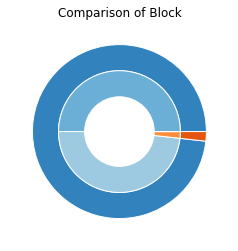

In [54]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

size = 0.3
vals = np.array([[56400, 54409], [1990, 1],])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Comparison of Block')
plt.show()

In [55]:
vals.sum(axis=1)

array([110809,   1991])

In [56]:
vals.flatten()

array([56400, 54409,  1990,     1])

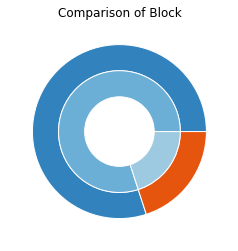

In [57]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

size = 0.3
vals = np.array([[50, 25,8], [30, 15,10],])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

ax.pie([80,20], radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie([80,20], radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Comparison of Block')
plt.show()

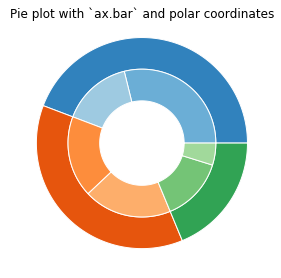

In [58]:
fig, ax = plt.subplots(subplot_kw=dict(polar=True))

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])
#normalize vals to 2 pi
valsnorm = vals/np.sum(vals)*2*np.pi
#obtain the ordinates of the bar edges
valsleft = np.cumsum(np.append(0, valsnorm.flatten()[:-1])).reshape(vals.shape)

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

ax.bar(x=valsleft[:, 0],
       width=valsnorm.sum(axis=1), bottom=1-size, height=size,
       color=outer_colors, edgecolor='w', linewidth=1, align="edge")

ax.bar(x=valsleft.flatten(),
       width=valsnorm.flatten(), bottom=1-2*size, height=size,
       color=inner_colors, edgecolor='w', linewidth=1, align="edge")

ax.set(title="Pie plot with `ax.bar` and polar coordinates")
ax.set_axis_off()
plt.show()

In [59]:
valsleft[:, 0]

array([0.        , 2.77910119, 5.10508806])

In [60]:
valsleft.flatten()

array([0.        , 1.8124573 , 2.77910119, 3.8967832 , 5.10508806,
       5.98110909])

In [61]:
ret = util.get_miner_payouts(blocks=blocks,start_height=555000,end_height=556000,miner_id="BTC.com"); ret

(205753224179, 163)

In [62]:
ret[0]*10**-8 # BTC

2057.53224179

In [63]:
ret = util.get_miner_payouts(blocks=blocks,start_height=500000,end_height=556000,miner_id="conflict"); ret

(537833695943, 409)

In [64]:
#assert False
with open(blocks_attribution_json_file, 'w') as fp: 
    json.dump(blocks, fp)

In [65]:
#assert False
with open(blocks_conflicts_json_file, 'w') as fp: 
    json.dump(block_conflicts, fp)

## Pie charts

In [ ]:
import datetime
from importlib import reload
reload(util)

In [ ]:
period = util.get_aligned_blkidx(backTime=datetime.timedelta(days=14))
period

In [ ]:
startBlk = period[0]
endBlk = period[1]

In [ ]:
mined_blocks_per_miner = Counter()

for blknum in blocks:
    if int(blknum) >= startBlk and int(blknum) <= endBlk:
        # only run over blocks in interval
        miner = blocks[ blknum ][ util.D_MINER ]
        #if miner != "":
        mined_blocks_per_miner[ miner ] += 1

In [ ]:
mined_blocks_per_miner.most_common(10)

In [ ]:
mined_blocks_per_miner.most_common()

In [ ]:
sum(mined_blocks_per_miner.values())*0.01

In [ ]:
for i in mined_blocks_per_miner.most_common():
    print(i)

In [ ]:
def pie_prepare(startBlk,endBlk,blocks):
    mined_blocks_per_miner = Counter()

    for blknum in blocks:
        if int(blknum) >= startBlk and int(blknum) <= endBlk:
            # only run over blocks in interval
            miner = blocks[ blknum ][ util.D_MINER ]
            #if miner != "":
            mined_blocks_per_miner[ miner ] += 1
            
    miscshare = int( sum(mined_blocks_per_miner.values())*0.01 )
    misccount = 0
    
    minerlabels = list()
    blockcount = list()
    minercolors = list()
    explode = list()
    
    for miner in mined_blocks_per_miner.most_common():
        if miner[1] > miscshare:
            minerlabels.append(miner[0])
            blockcount.append(miner[1])
            minercolors.append( miners[ miner[0] ][ util.D_CONFIG ][ util.DD_COLOR ] )
            explode.append(0)
        else:
            # if the number of blocky by this miner is below 1% share
            # then add the miner share to misc
            misccount += miner[ 1 ]
    minerlabels.append("misc")
    blockcount.append(misccount)
    minercolors.append( miners[ "misc" ][ util.D_CONFIG ][ util.DD_COLOR ] )
    explode.append(0)
    
    if len(explode) >= 1:
        # set largetst miner share to be highlighted
        #explode[0] = 0.1
        pass
        
    return (minerlabels,blockcount,minercolors,tuple(explode))

In [ ]:
labels,sizes,colors,explode = pie_prepare(startBlk,endBlk,blocks)

plt.figure(figsize=(16,9))
ax1 = plt.gca()
#fig1, ax1 = plt.subplots()

patches, texts, autotexts = ax1.pie(sizes, 
        explode=explode, 
        colors=colors, 
        labels=labels, 
        autopct='%1.1f%%', 
        shadow=False, 
        radius=0.3,
        startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Start block: ' + str(startBlk) + ' End block: ' + str(endBlk), y=1.08, fontsize=20)
max_label_size = 10
min_label_size = 5
label_factor = 3
for t,at in zip(texts, autotexts):
    #fontsize_labels = max(min(label_factor*float(at.get_text()[:-1]), max_label_size), min_label_size)
    #fontsize_perc = max(12*float(at.get_text()[:-1]), 25)
    fontsize_labels = 18
    fontsize_perc = 15
    t.set_fontsize(fontsize_labels) # labels
    at.set_fontsize(fontsize_perc)  # percentages

#plt.savefig("")
plt.show()


## Stack plots